## Customer churn prediction model

Goal is to predict which customers are likely to stop using a company's product or service.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data exploration

Dataset "Customer Churn Dataset" by Muhammad Shahid Azeem has been acquired on kaggle (https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset)

Train and test datasets will be merged while this data exploration is going and then they'll be split again after that.

In [62]:
df0 = pd.read_csv("./dataset/customer_churn_dataset-training-master.csv")
df1 = pd.read_csv("./dataset/customer_churn_dataset-testing-master.csv")
df = pd.concat([df0, df1])

In [63]:
df.head()

CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  
4              20.0    1.0

Looking at the dataset we have quite a few features. CustumerID can be ignored for the model as it can affect model in a bad manner. 

Other features seem okay so we can proceed with dropping CustomerID and exploring other data.

In [65]:
df.drop(columns=["CustomerID"], axis=1, inplace= True)

Now check the datatypes of columns.

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505207 entries, 0 to 64373
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                505206 non-null  float64
 1   Gender             505206 non-null  object 
 2   Tenure             505206 non-null  float64
 3   Usage Frequency    505206 non-null  float64
 4   Support Calls      505206 non-null  float64
 5   Payment Delay      505206 non-null  float64
 6   Subscription Type  505206 non-null  object 
 7   Contract Length    505206 non-null  object 
 8   Total Spend        505206 non-null  float64
 9   Last Interaction   505206 non-null  float64
 10  Churn              505206 non-null  float64
dtypes: float64(8), object(3)
memory usage: 46.3+ MB


Missing values check.

In [73]:
df.isna().sum()

Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [75]:
isna_values = df[df.isna().any(axis=1)]
isna_values

Age Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
199295  NaN    NaN     NaN              NaN            NaN            NaN   

       Subscription Type Contract Length  Total Spend  Last Interaction  Churn  
199295               NaN             NaN          NaN               NaN    NaN

Since one row has all the missing values it needs to be dropped.

In [78]:
df.dropna(thresh = 5, inplace = True)

In [80]:
df.isna().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

Row has been dropped. There is no additional remaining values. 

Now check for outliers.

In [83]:
df.describe()

Age         Tenure  Usage Frequency  Support Calls  \
count  505206.000000  505206.000000    505206.000000  505206.000000   
mean       39.704172      31.350435        15.714825       3.833317   
std        12.670577      17.237482         8.619323       3.133603   
min        18.000000       1.000000         1.000000       0.000000   
25%        29.000000      16.000000         8.000000       1.000000   
50%        40.000000      32.000000        16.000000       3.000000   
75%        49.000000      46.000000        23.000000       6.000000   
max        65.000000      60.000000        30.000000      10.000000   

       Payment Delay    Total Spend  Last Interaction          Churn  
count  505206.000000  505206.000000     505206.000000  505206.000000  
mean       13.496843     620.072766         14.610581       0.555203  
std         8.451187     245.319256          8.608286       0.496944  
min         0.000000     100.000000          1.000000       0.000000  
25%         6.000000     446.000000          7.000000       0.000000  
50%        13.000000     648.900000         14.000000       1.000000  
75%        20.000000     824.000000         22.000000       1.000000  
max        30.000000    1000.000000         30.000000       1.000000

All values here seem without any outliers.

Now, categorical features need to be checked.

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505206 entries, 0 to 64373
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                505206 non-null  float64
 1   Gender             505206 non-null  object 
 2   Tenure             505206 non-null  float64
 3   Usage Frequency    505206 non-null  float64
 4   Support Calls      505206 non-null  float64
 5   Payment Delay      505206 non-null  float64
 6   Subscription Type  505206 non-null  object 
 7   Contract Length    505206 non-null  object 
 8   Total Spend        505206 non-null  float64
 9   Last Interaction   505206 non-null  float64
 10  Churn              505206 non-null  float64
dtypes: float64(8), object(3)
memory usage: 46.3+ MB


Genders check.

In [94]:
df.Gender.value_counts()

Gender
Male      280273
Female    224933
Name: count, dtype: int64

Subscription Type check.

In [97]:
df["Subscription Type"].value_counts()

Subscription Type
Standard    170630
Premium     170099
Basic       164477
Name: count, dtype: int64

Contract length check.

In [100]:
df["Contract Length"].value_counts()

Contract Length
Annual       198608
Quarterly    197364
Monthly      109234
Name: count, dtype: int64

Data looks balanced good. Now lets check histograms to see how balanced it is.

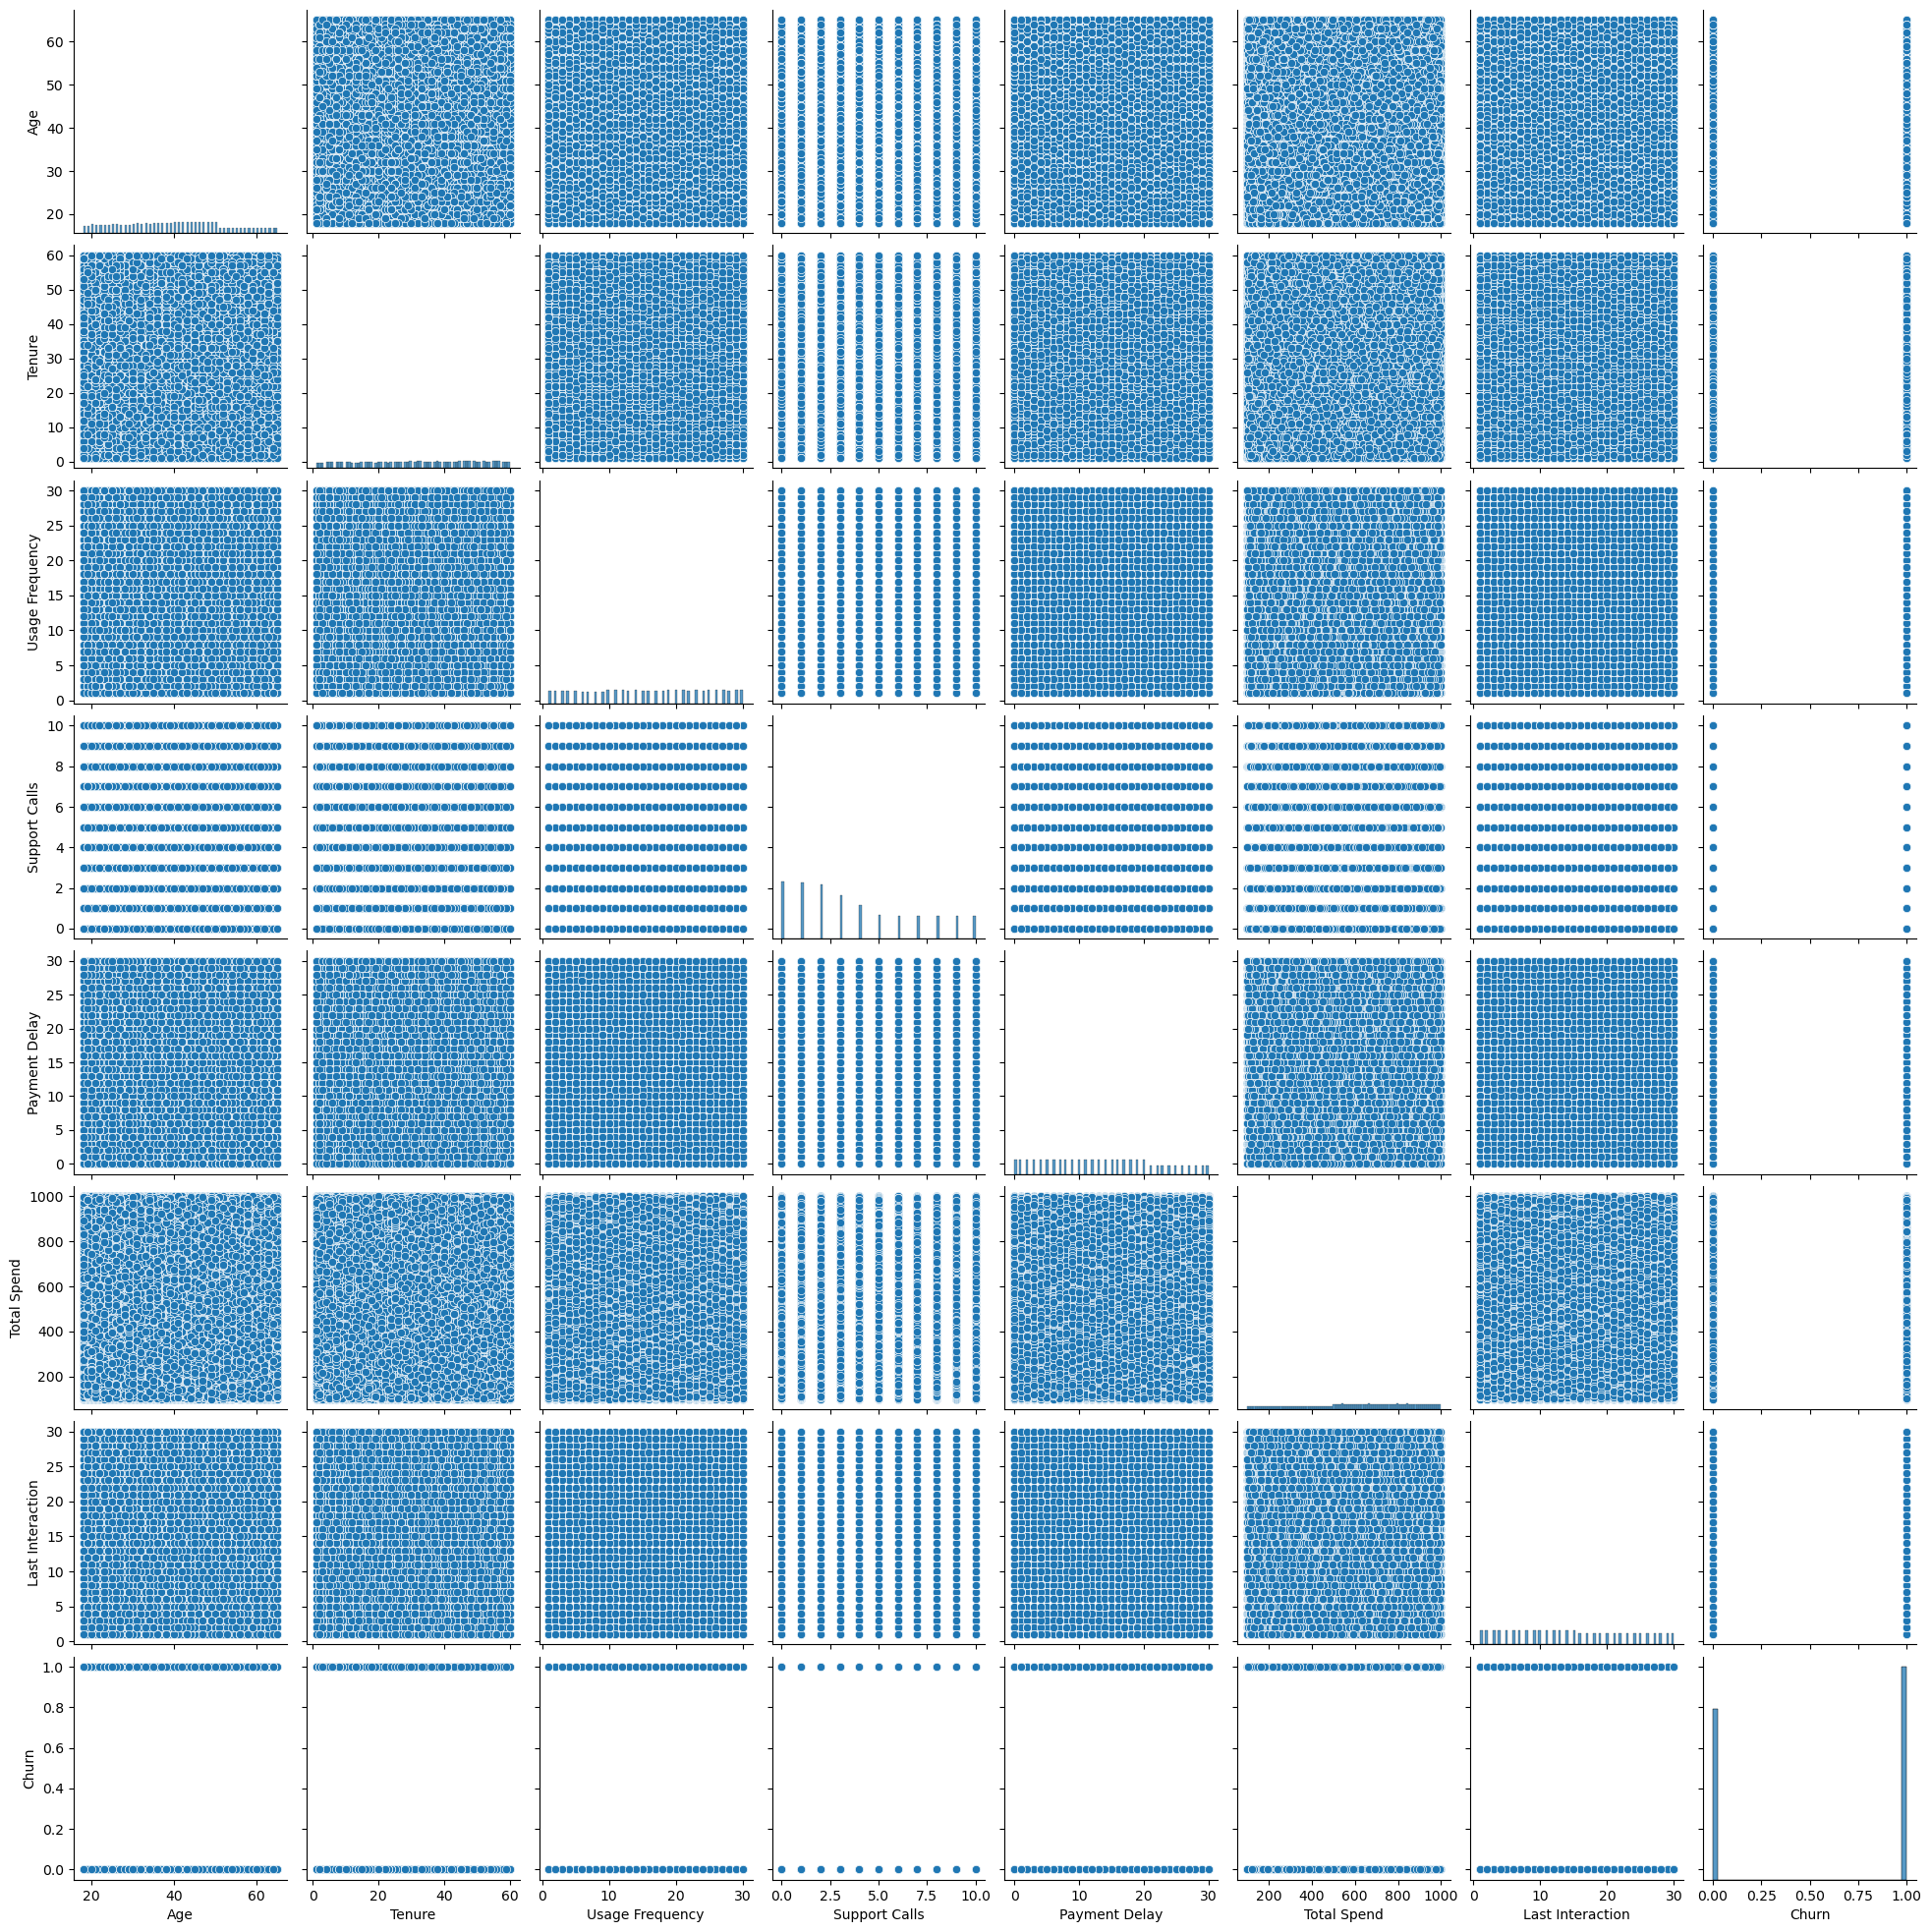

In [103]:
sns.pairplot(data=df)

As seen above it's mostly uniform distribution. Categorical data check bellow.

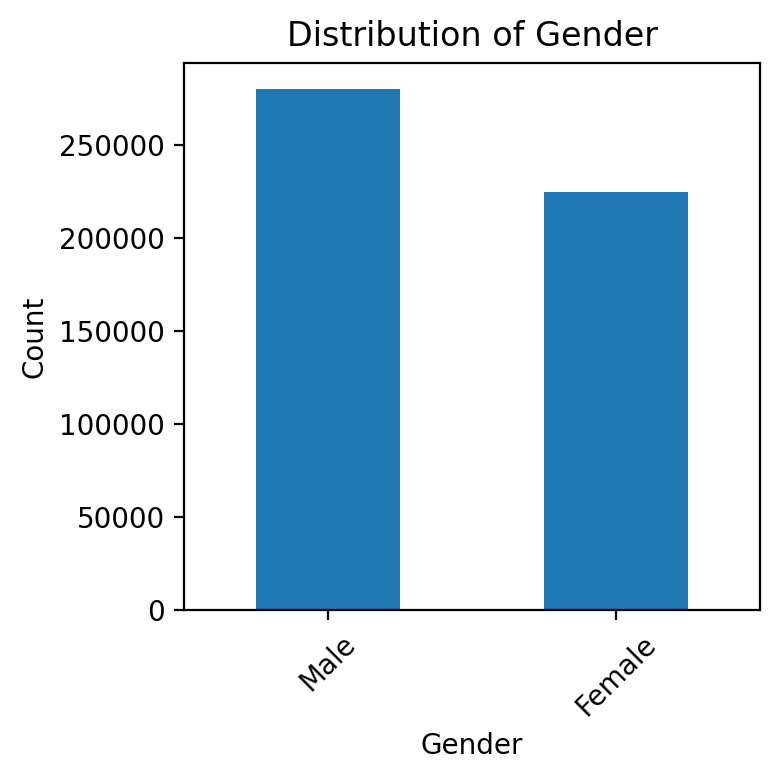

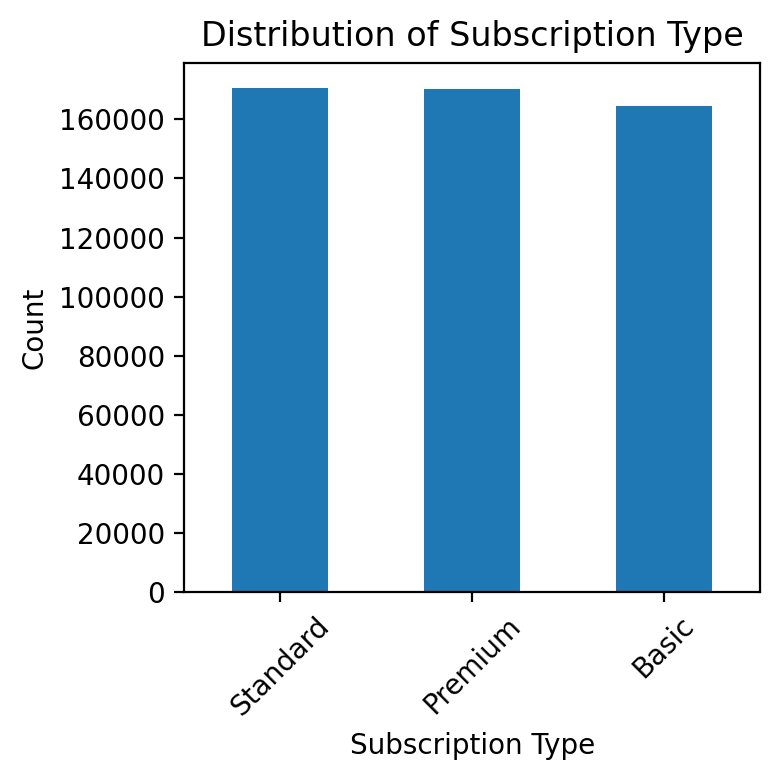

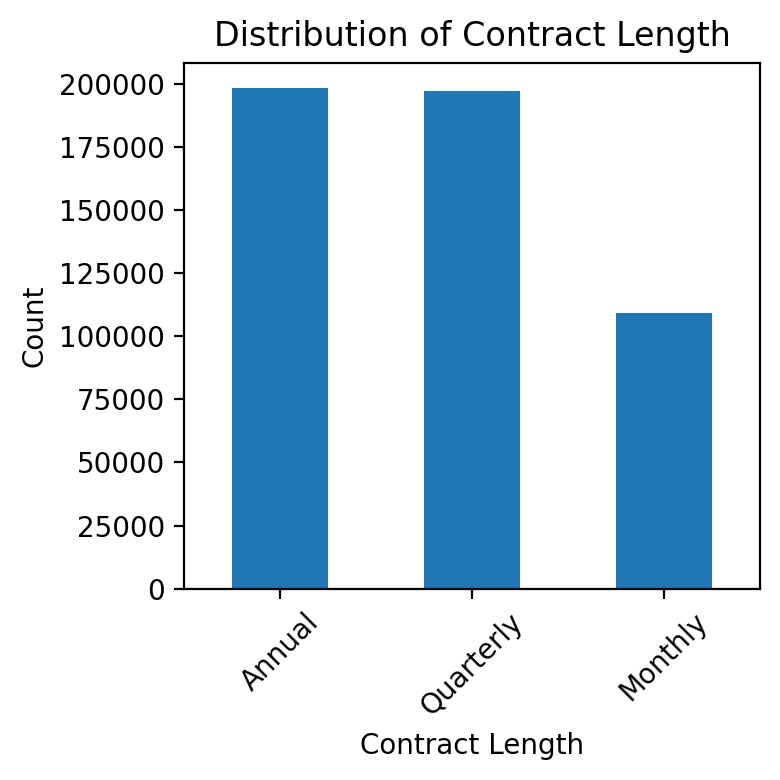

In [126]:
def plot_categorical_feature(df, feature):
    feature_counts = df[feature].value_counts()
    plt.figure(figsize=(4, 4), dpi=200)
    feature_counts.plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

categorical_features = ['Gender', 'Subscription Type', 'Contract Length']
for feature in categorical_features:
    plot_categorical_feature(df, feature)

These also have uniform distribution.

### Correlation check

<Axes: >

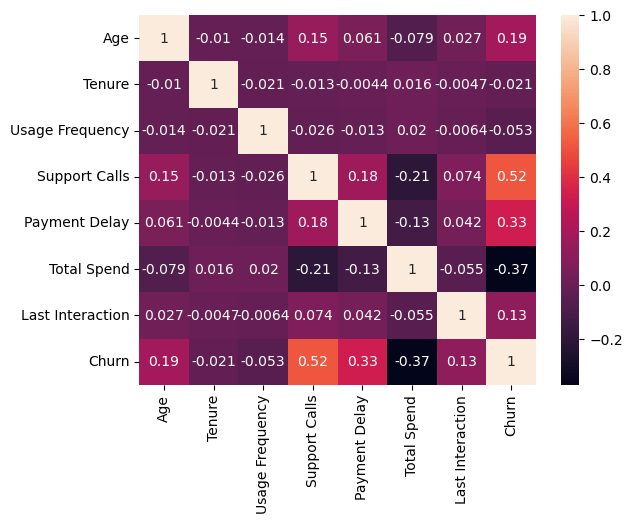

In [129]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

From numeric variables strongest correlation is visible on features like "Support Calls", "Payment Delay", "Total Spend".

Later there will be a section where specific variables will be chosen for model generation.

### Conversion of categorical features

In [133]:
def categorical_to_numerical(df, categorical_columns):
    # Creation a copy of the dataframe to avoid modifying the original
    df_encoded = df.copy()
    
    # One-hot encoding of the categorical features
    df_encoded = pd.get_dummies(df_encoded, columns=categorical_columns, drop_first=True)
    
    # Churn formatting
    df_encoded['Churn'] = df_encoded['Churn'].astype(int)
    
    return df_encoded

categorical_columns = ['Gender', 'Subscription Type', 'Contract Length']

df_transformed = categorical_to_numerical(df, categorical_columns)

df_transformed

Age  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0      30.0    39.0             14.0            5.0           18.0   
1      65.0    49.0              1.0           10.0            8.0   
2      55.0    14.0              4.0            6.0           18.0   
3      58.0    38.0             21.0            7.0            7.0   
4      23.0    32.0             20.0            5.0            8.0   
...     ...     ...              ...            ...            ...   
64369  45.0    33.0             12.0            6.0           21.0   
64370  37.0     6.0              1.0            5.0           22.0   
64371  25.0    39.0             14.0            8.0           30.0   
64372  50.0    18.0             19.0            7.0           22.0   
64373  52.0    45.0             15.0            9.0           25.0   

       Total Spend  Last Interaction  Churn  Gender_Male  \
0            932.0              17.0      1        False   
1            557.0               6.0      1        False   
2            185.0               3.0      1        False   
3            396.0              29.0      1         True   
4            617.0              20.0      1         True   
...            ...               ...    ...          ...   
64369        947.0              14.0      1        False   
64370        923.0               9.0      1         True   
64371        327.0              20.0      1         True   
64372        540.0              13.0      1        False   
64373        696.0              22.0      1        False   

       Subscription Type_Premium  Subscription Type_Standard  \
0                          False                        True   
1                          False                       False   
2                          False                       False   
3                          False                        True   
4                          False                       False   
...                          ...                         ...   
64369                      False                       False   
64370                      False                        True   
64371                       True                       False   
64372                      False                        True   
64373                      False                        True   

       Contract Length_Monthly  Contract Length_Quarterly  
0                        False                      False  
1                         True                      False  
2                        False                       True  
3                         True                      False  
4                         True                      False  
...                        ...                        ...  
64369                    False                       True  
64370                    False                      False  
64371                     True                      False  
64372                     True                      False  
64373                     True                      False  

[505206 rows x 13 columns]

### Building a model

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [164]:
# Label / data separation
X = df_transformed.drop('Churn', axis=1)
y = df_transformed['Churn']

In [166]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [168]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Logistic Regression

Logistic regression will be used as a ML method applied to this problem

In [144]:
# Training the model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [146]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [148]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8460739098592664

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     44981
           1       0.87      0.85      0.86     56061

    accuracy                           0.85    101042
   macro avg       0.84      0.85      0.84    101042
weighted avg       0.85      0.85      0.85    101042


Confusion Matrix:
[[37997  6984]
 [ 8569 47492]]


These results are not great, but not terrible either. I'll try another ML method but first, let's check which features were most important.

In [151]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(model.coef_[0])
}).sort_values('importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance.head(10))


Top 10 Important Features:
                       feature  importance
3                Support Calls    1.277648
10     Contract Length_Monthly    0.868663
5                  Total Spend    0.772706
4                Payment Delay    0.709962
7                  Gender_Male    0.366009
0                          Age    0.293257
6             Last Interaction    0.283547
2              Usage Frequency    0.110413
8    Subscription Type_Premium    0.035627
9   Subscription Type_Standard    0.032476


#### Support Vector Machines (SVM)

In [170]:
# Train the model
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [184]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [185]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9118881257298945

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     44981
           1       0.90      0.95      0.92     56061

    accuracy                           0.91    101042
   macro avg       0.92      0.91      0.91    101042
weighted avg       0.91      0.91      0.91    101042


Confusion Matrix:
[[38770  6211]
 [ 2692 53369]]


In [225]:
from joblib import dump, load

# Save the model
def save_model_and_scaler(model, scaler, model_filename='svm_churn_model_original.joblib', scaler_filename='scaler_original.joblib'):
    # Save the model
    dump(model, model_filename)
    print(f"Model saved as {model_filename}")

    # Save the scaler
    dump(scaler, scaler_filename)
    print(f"Scaler saved as {scaler_filename}")

save_model_and_scaler(model, scaler)

Model saved as svm_churn_model_original.joblib
Scaler saved as scaler_original.joblib


#### Dimension reduction using PCA and data split

In [198]:
from sklearn.decomposition import PCA

def apply_pca(X, n_components=0.8):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    print(f"Reduced from {X.shape[1]} to {X_pca.shape[1]} dimensions")
    return X_pca, pca

X_train_pca, pca_model = apply_pca(X_train_scaled)
X_test_pca = pca_model.transform(X_test_scaled)

Reduced from 12 to 9 dimensions


##### Reduced dimensions SVM

In [201]:
# Train the model
model_reduced = SVC(kernel='rbf', random_state=42)
model_reduced.fit(X_train_pca, y_train)

SVC(random_state=42)

In [215]:
# Make predictions
y_pred = model_reduced.predict(X_test_pca)

In [216]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8973694107400882

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88     44981
           1       0.89      0.93      0.91     56061

    accuracy                           0.90    101042
   macro avg       0.90      0.89      0.90    101042
weighted avg       0.90      0.90      0.90    101042


Confusion Matrix:
[[38720  6261]
 [ 4109 51952]]


As seen above, PCA reduction reduces time required for training and accuracy is reduced by 2%

In [223]:
from joblib import dump, load

def save_model_scaler_pca(model, scaler, PCA, model_filename='svm_churn_model.joblib', scaler_filename='scaler.joblib', PCA_filename="pca_reduce.joblib"):
    # Save the model
    dump(model, model_filename)
    print(f"Model saved as {model_filename}")

    # Save the scaler
    dump(scaler, scaler_filename)
    print(f"Scaler saved as {scaler_filename}")

    # Save the PCA model
    dump(pca_model, PCA_filename)
    print(f"PCA saved as {PCA_filename}")

save_model_scaler_pca(model_reduced, scaler, pca_model)

Model saved as svm_churn_model.joblib
Scaler saved as scaler.joblib
Scaler saved as pca_reduce.joblib


#### Additional feature selection

<Axes: >

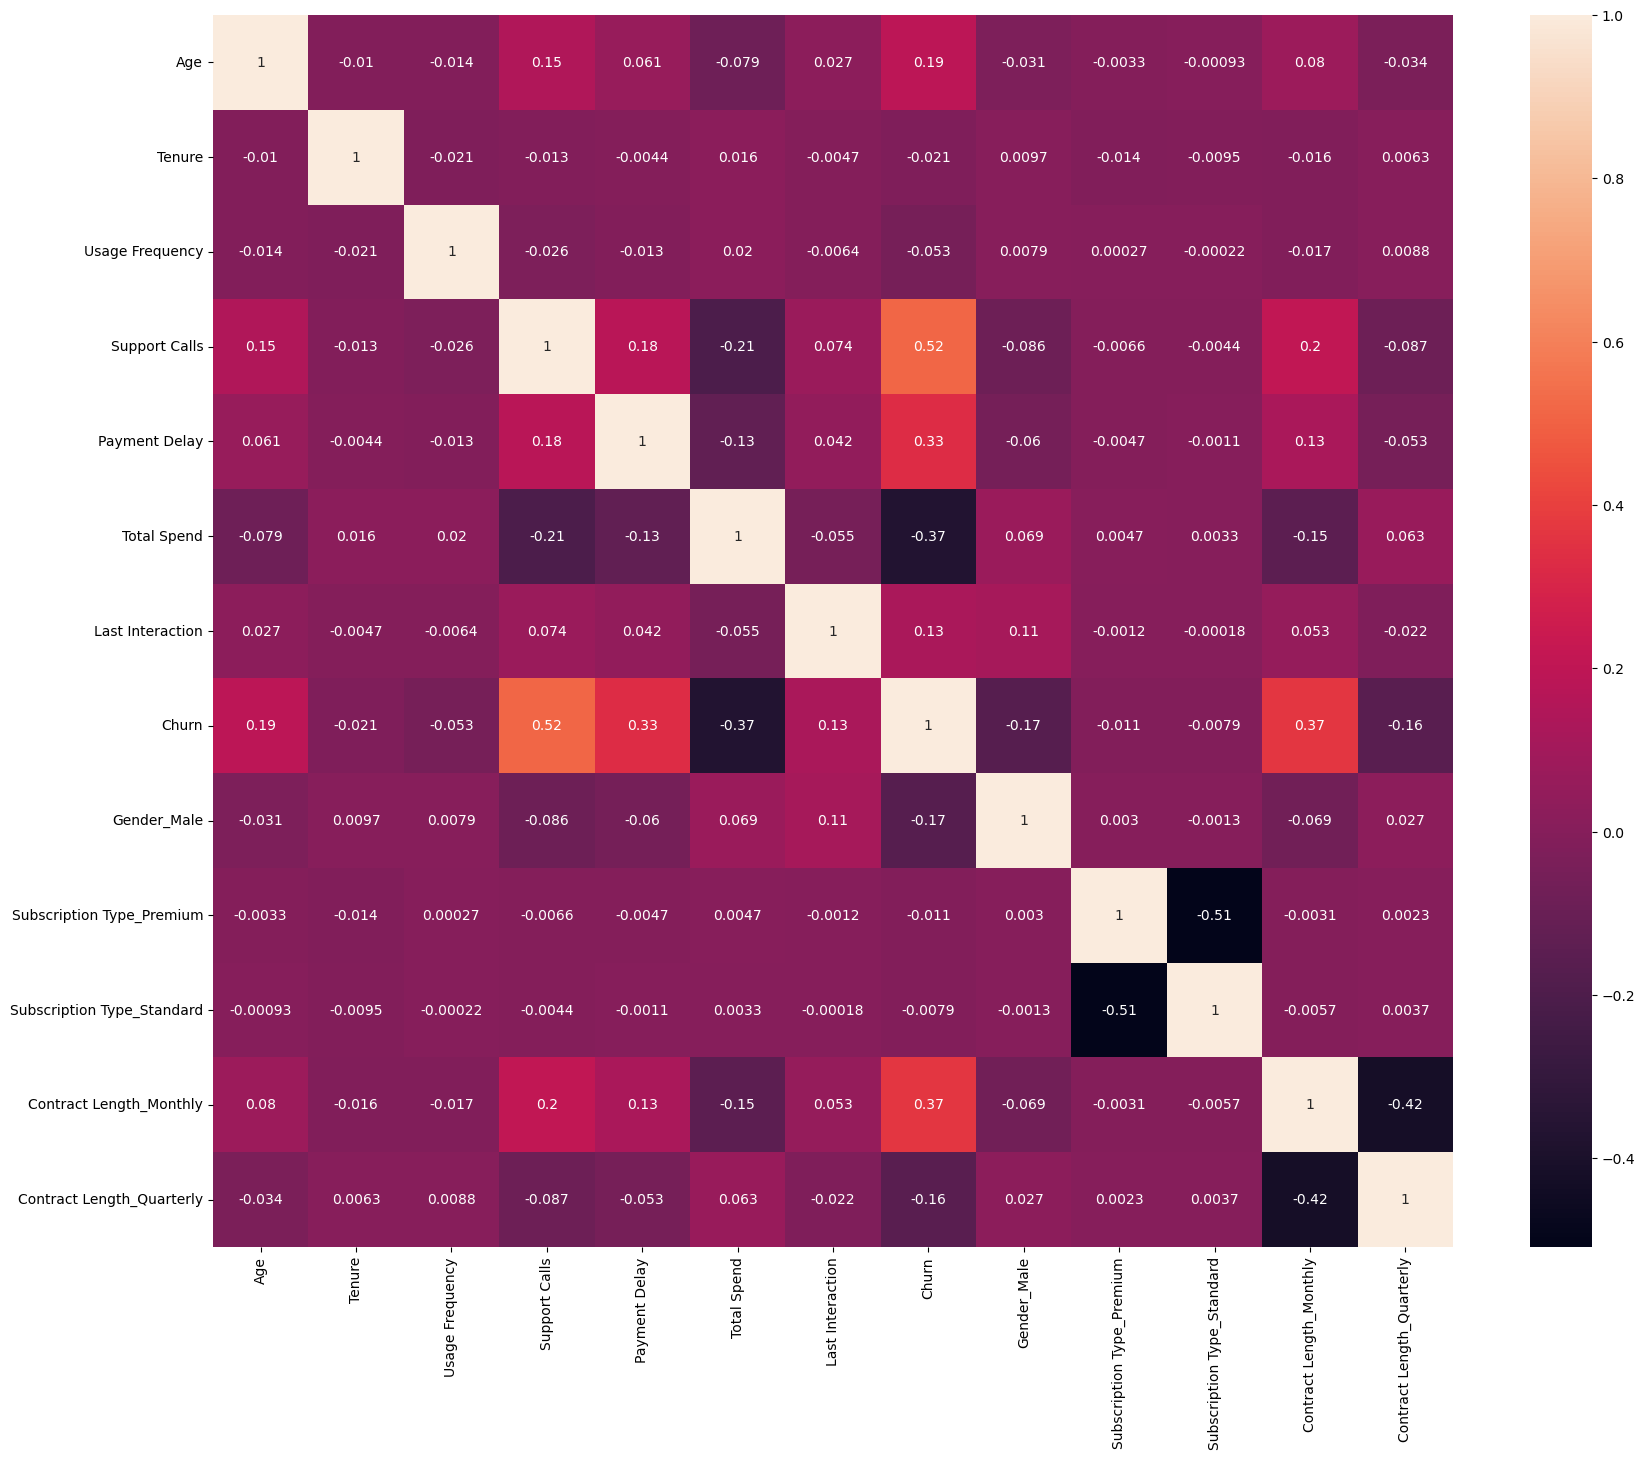

In [239]:
plt.figure(figsize=(20, 16))
sns.heatmap(df_transformed.corr(), annot= True)

Based on this, I'll pick features with best correlation. Others will be dropped.



In [241]:
df_transformed.columns

Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction', 'Churn', 'Gender_Male',
       'Subscription Type_Premium', 'Subscription Type_Standard',
       'Contract Length_Monthly', 'Contract Length_Quarterly'],
      dtype='object')

In [245]:
# These features will be dropped as they are closest to 0. This will reduce number of features from 11 to 8 (Churn not included)

to_drop = ['Subscription Type_Premium', 'Subscription Type_Standard', 'Tenure', 'Usage Frequency']

In [247]:
df_transformed.drop(to_drop, axis=1, inplace= True)

In [272]:
df_transformed.columns

Index(['Age', 'Support Calls', 'Payment Delay', 'Total Spend',
       'Last Interaction', 'Churn', 'Gender_Male', 'Contract Length_Monthly',
       'Contract Length_Quarterly'],
      dtype='object')



Additionally, PCA will be used on this reduced after spliting and scaling the data to additionally reduce number of dimensions.
This is done in order to check if this quicker training will result in similar preformance to the longest training (SVM without PCA).



In [253]:
# Label / data separation
X = df_transformed.drop('Churn', axis=1)
y = df_transformed['Churn']

In [255]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [257]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [259]:
# PCA
def apply_pca(X, n_components=0.9):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    print(f"Reduced from {X.shape[1]} to {X_pca.shape[1]} dimensions")
    return X_pca, pca

X_train_pca, pca_model = apply_pca(X_train_scaled)
X_test_pca = pca_model.transform(X_test_scaled)

Reduced from 8 to 7 dimensions


In [261]:
# Train the model
model_reduced = SVC(kernel='rbf', random_state=42)
model_reduced.fit(X_train_pca, y_train)

SVC(random_state=42)

In [262]:
# Make predictions
y_pred = model_reduced.predict(X_test_pca)

In [263]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9154608974485857

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     44981
           1       0.90      0.96      0.93     56061

    accuracy                           0.92    101042
   macro avg       0.92      0.91      0.91    101042
weighted avg       0.92      0.92      0.91    101042


Confusion Matrix:
[[38711  6270]
 [ 2272 53789]]


As seen above, this new model with reduced number of features works as good as previous 2.



In [270]:
save_model_scaler_pca(model_reduced, scaler, pca_model, model_filename='svm_churn_model2.joblib', scaler_filename='scaler2.joblib', PCA_filename="pca_reduce2.joblib")

Model saved as svm_churn_model2.joblib
Scaler saved as scaler2.joblib
Scaler saved as pca_reduce2.joblib


#### Support Vector Machines (SVM) - with GridSearch

This would take a really long time so these cells were never run.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

In [ ]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

In [ ]:
# Train the model with best parameters
best_model = grid_search.best_estimator_

In [ ]:
# Final evaluation
y_pred = best_model.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

### Saving the best model and scaler

In [ ]:
# Saving the model

def save_model_and_scaler(model, scaler, model_filename='svm_churn_model.joblib', scaler_filename='scaler.joblib'):
    # Save the model
    dump(model, model_filename)
    print(f"Model saved as {model_filename}")

    # Save the scaler
    dump(scaler, scaler_filename)
    print(f"Scaler saved as {scaler_filename}")

save_model_and_scaler(best_model, scaler)